In [14]:
import sklearn
sklearn.__version__

'0.24.1'

In [15]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt

In [16]:
iris=datasets.load_iris()
X_train,X_test,Y_train,Y_test=tts(iris.data,iris.target,random_state=1)


In [17]:
clf=DecisionTreeClassifier(random_state=1)
clf


DecisionTreeClassifier(random_state=1)

In [18]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf


DecisionTreeRegressor()

In [19]:
clf.fit(X_train,Y_train)
pred_y=clf.predict(X_test)
pred_y

array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 2., 0., 2., 1., 0., 0., 1., 2., 1., 2., 1., 2.,
       2., 0., 1., 0.])

In [20]:
from sklearn.metrics import accuracy_score
print("Train score",clf.score(X_train,Y_train))

Train score 1.0


[Text(3124.8, 3986.4, 'petal length (cm) <= 2.6\nmse = 0.695\nsamples = 112\nvalue = 1.036'),
 Text(2343.6000000000004, 3261.6000000000004, 'mse = 0.0\nsamples = 37\nvalue = 0.0'),
 Text(3906.0, 3261.6000000000004, 'petal width (cm) <= 1.65\nmse = 0.248\nsamples = 75\nvalue = 1.547'),
 Text(1562.4, 2536.8, 'petal length (cm) <= 4.95\nmse = 0.096\nsamples = 37\nvalue = 1.108'),
 Text(781.2, 1812.0, 'mse = 0.0\nsamples = 32\nvalue = 1.0'),
 Text(2343.6000000000004, 1812.0, 'petal width (cm) <= 1.55\nmse = 0.16\nsamples = 5\nvalue = 1.8'),
 Text(1562.4, 1087.1999999999998, 'mse = 0.0\nsamples = 3\nvalue = 2.0'),
 Text(3124.8, 1087.1999999999998, 'petal length (cm) <= 5.45\nmse = 0.25\nsamples = 2\nvalue = 1.5'),
 Text(2343.6000000000004, 362.39999999999964, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(3906.0, 362.39999999999964, 'mse = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(6249.6, 2536.8, 'petal length (cm) <= 4.85\nmse = 0.026\nsamples = 38\nvalue = 1.974'),
 Text(5468.400000000001, 18

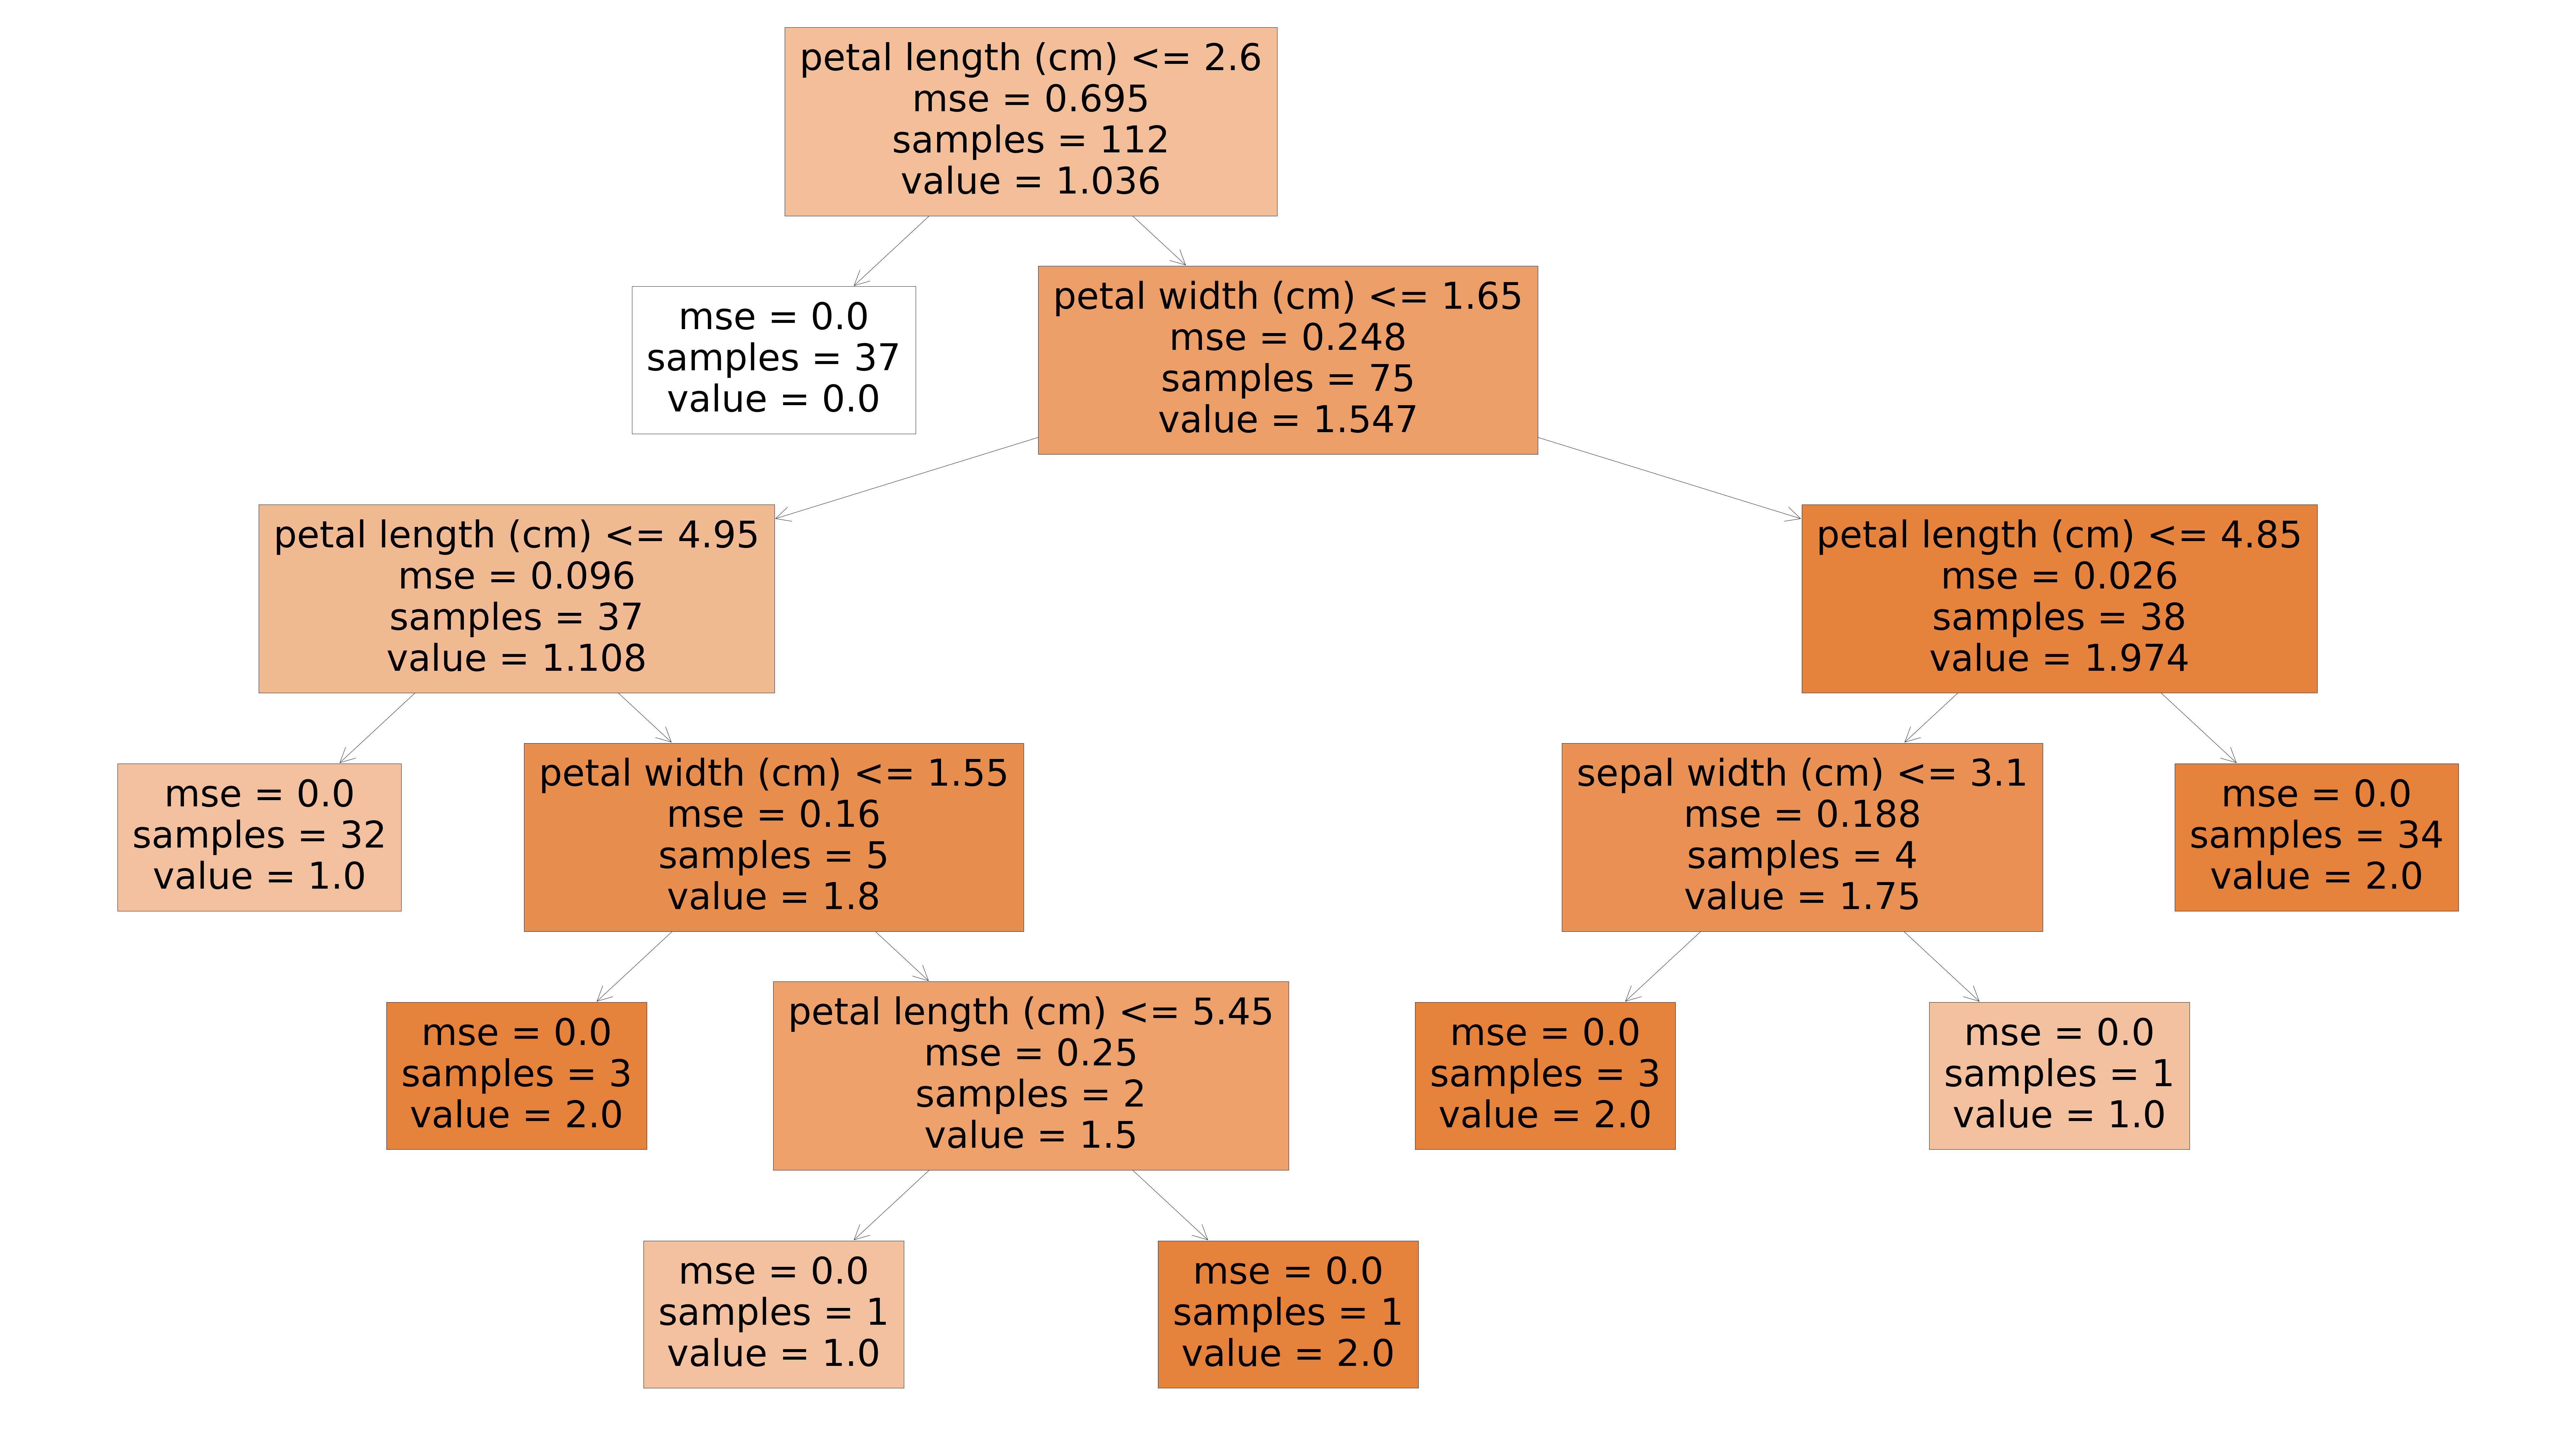

In [21]:
from sklearn import tree
plt.figure(figsize=(140,80))
tree.plot_tree(clf,filled=True,feature_names=iris.feature_names,max_depth=5)

In [22]:
path=clf.cost_complexity_pruning_path(X_train,Y_train)
path

{'ccp_alphas': array([0.        , 0.00357143, 0.0043468 , 0.02471042, 0.12540549,
        0.52920068]),
 'impurities': array([0.        , 0.00714286, 0.01583647, 0.04054689, 0.16595238,
        0.69515306])}

In [23]:
ccp_alphas,impurities=path.ccp_alphas,path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

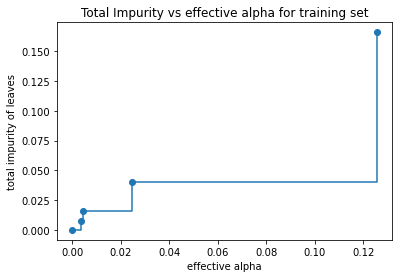

In [24]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [25]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
    print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

print(clfs)    

Number of nodes in the last tree is: 15 with ccp_alpha: 0.5292006802721083
Number of nodes in the last tree is: 15 with ccp_alpha: 0.5292006802721083
Number of nodes in the last tree is: 15 with ccp_alpha: 0.5292006802721083
Number of nodes in the last tree is: 7 with ccp_alpha: 0.5292006802721083
Number of nodes in the last tree is: 5 with ccp_alpha: 0.5292006802721083
Number of nodes in the last tree is: 1 with ccp_alpha: 0.5292006802721083
[DecisionTreeClassifier(random_state=1), DecisionTreeClassifier(ccp_alpha=0.003571428571428565, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0043468045112782195, random_state=1), DecisionTreeClassifier(ccp_alpha=0.024710424710424714, random_state=1), DecisionTreeClassifier(ccp_alpha=0.12540549007654295, random_state=1), DecisionTreeClassifier(ccp_alpha=0.5292006802721083, random_state=1)]


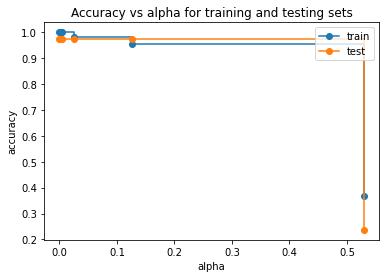

In [26]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [27]:
clf=DecisionTreeClassifier(random_state=1,ccp_alpha=0.25)
clf.fit(X_train,Y_train)
train_pred_y=clf.predict(X_train)
pred_y=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("accuracy on testing data",accuracy_score(Y_test,pred_y))
print("accuracy on training data",accuracy_score(Y_train,train_pred_y))

accuracy on testing data 0.9736842105263158
accuracy on training data 0.9553571428571429


[Text(446.4, 543.6, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(223.2, 326.16, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(669.5999999999999, 326.16, 'petal width (cm) <= 1.65\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(446.4, 108.72000000000003, 'gini = 0.193\nsamples = 37\nvalue = [0, 33, 4]\nclass = versicolor'),
 Text(892.8, 108.72000000000003, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = virginica')]

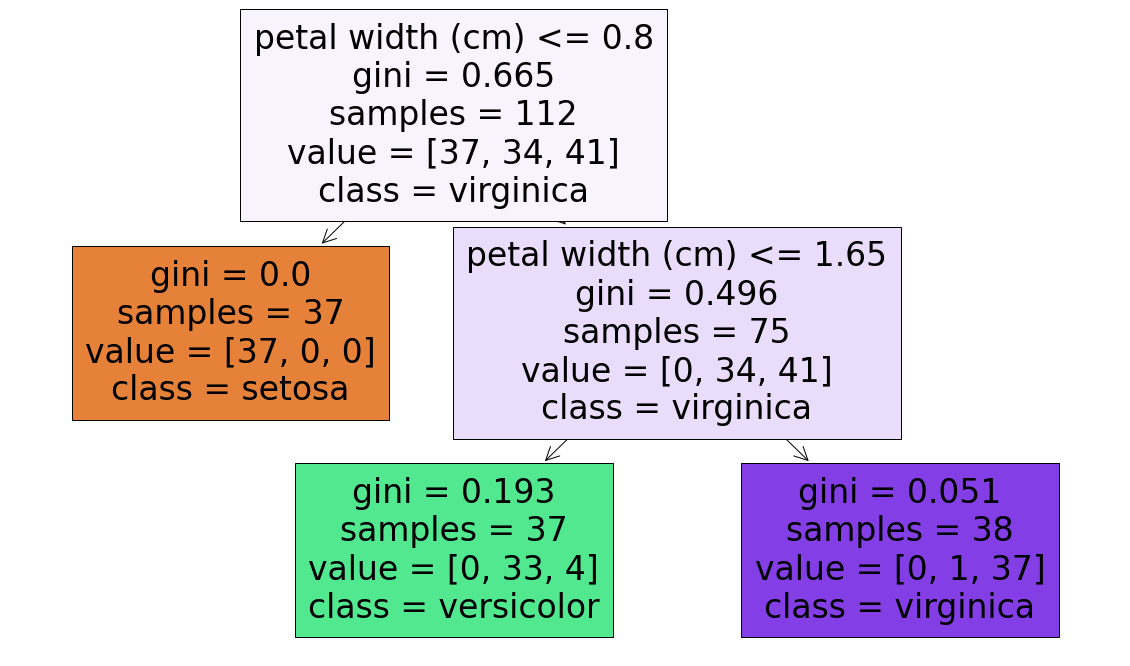

In [28]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)